In [384]:
import pandas as pd
import math
from pykospacing import Spacing
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 합니다.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

# 라이브러리를 로드합니다.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 워드클라우드 생성
from wordcloud import WordCloud

# 한글폰트를 설정합니다.
plt.rc('font',family='AppleGothic')
plt.rc('axes',unicode_minus=False)

In [385]:
# 문서 4개라고 가정

docs = [
    '마트 딸기 진짜 비싸다.',
    '나는 오늘 아침 사과 먹겠다.',
    '아침 사과 사과',
    '나는 오늘 저녁 딸기 먹겠다.'
]

In [386]:
vocab = list(set([word for doc in docs for word in doc.split()]))

In [387]:
vocab

['나는', '딸기', '저녁', '진짜', '비싸다.', '오늘', '아침', '사과', '마트', '먹겠다.']

In [388]:
# 총 문서의 수
N = len(docs)

# DTM (Document Term Matrix)
# 어떤 문서안에 단어가 몇번이나 나왔는가

In [389]:
dtm = []

for idx in range(N):
    doc = docs[idx]
    in_dtm = []
    
    for v_idx in range(len(vocab)):
        voca = vocab[v_idx]
        in_dtm.append(doc.count(voca))
        
    dtm.append(in_dtm)

In [390]:
pd.DataFrame(dtm, columns=vocab, index=["1번문서","2번문서","3번문서","4번문서"])

,나는,딸기,저녁,진짜,비싸다.,오늘,아침,사과,마트,먹겠다.
1번문서,0,1,0,1,1,0,0,0,1,0
2번문서,1,0,0,0,0,1,1,1,0,1
3번문서,0,0,0,0,0,0,1,2,0,0
4번문서,1,1,1,0,0,1,0,0,0,1


In [391]:
def tf(t, d):
    # 문서 d에서 단어 t가 몇번이나 나왔는지를 카운트한 뒤 리턴
    return d.count(t)

def df(t, D):
    # 문서군 D의 각 문서 d에서 t가 몇번이나 나왔는지를 카운트한 뒤 리턴, 단 d에서 t가 존재하는지 여부만 체크
    df = 0
    for d in D:
        df += t in d
    return df

def idf(t, D):
    # df의 역수를 리턴
    # 0 이 나올 수 있기 때문에 1을 더 해준다
    N = len(D)
    # return log(N / df(t,D) + 1)
    return math.log(N / (df(t,D) + 1))

def tf_idf(t, d, D):
    # tf * idf를 리턴
    return tf(t,d) * idf(t,D)

In [392]:
result = []

for idx in range(N):
    result.append([])
    doc = docs[idx]
    
    for v_idx in range(len(vocab)):
        token = vocab[v_idx]
        result[-1].append(tf(token,doc))

In [393]:
_tf = pd.DataFrame(result, columns=vocab)

In [394]:
# _ 는 상수 취급, 파이썬은 상수가 없기 때문에
_tf

,나는,딸기,저녁,진짜,비싸다.,오늘,아침,사과,마트,먹겠다.
0,0,1,0,1,1,0,0,0,1,0
1,1,0,0,0,0,1,1,1,0,1
2,0,0,0,0,0,0,1,2,0,0
3,1,1,1,0,0,1,0,0,0,1


In [395]:
result = []

for v_idx in range(len(vocab)):
    token = vocab[v_idx]
    result.append(idf(token,docs))

In [396]:
_idf = pd.DataFrame(result, index=vocab, columns=['IDF'])

In [397]:
_idf

,IDF
나는,0.287682
딸기,0.287682
저녁,0.693147
진짜,0.693147
비싸다.,0.693147
오늘,0.287682
아침,0.287682
사과,0.287682
마트,0.693147
먹겠다.,0.287682


In [398]:
result = []
for idx in range(N):
    result.append([])
    d = docs[idx]
    
    for v_idx in range(len(vocab)):
        t = vocab[v_idx]
        result[-1].append(tf_idf(t,d,docs))

In [399]:
result

[[0.0,
  0.28768207245178085,
  0.0,
  0.6931471805599453,
  0.6931471805599453,
  0.0,
  0.0,
  0.0,
  0.6931471805599453,
  0.0],
 [0.28768207245178085,
  0.0,
  0.0,
  0.0,
  0.0,
  0.28768207245178085,
  0.28768207245178085,
  0.28768207245178085,
  0.0,
  0.28768207245178085],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.28768207245178085,
  0.5753641449035617,
  0.0,
  0.0],
 [0.28768207245178085,
  0.28768207245178085,
  0.6931471805599453,
  0.0,
  0.0,
  0.28768207245178085,
  0.0,
  0.0,
  0.0,
  0.28768207245178085]]

In [400]:
_tf_idf = pd.DataFrame(result, columns=vocab)

In [401]:
_tf_idf

,나는,딸기,저녁,진짜,비싸다.,오늘,아침,사과,마트,먹겠다.
0,0.000000,0.287682,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.693147,0.000000
1,0.287682,0.000000,0.000000,0.000000,0.000000,0.287682,0.287682,0.287682,0.000000,0.287682
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.287682,0.575364,0.000000,0.000000
3,0.287682,0.287682,0.693147,0.000000,0.000000,0.287682,0.000000,0.000000,0.000000,0.287682


---

In [402]:
from sklearn.feature_extraction.text import CountVectorizer

In [403]:
vector = CountVectorizer()

In [404]:
vector.fit_transform(docs).toarray()

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 2, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 1, 1, 0]])

In [405]:
vector.vocabulary_

{'마트': 2,
 '딸기': 1,
 '진짜': 9,
 '비싸다': 4,
 '나는': 0,
 '오늘': 7,
 '아침': 6,
 '사과': 5,
 '먹겠다': 3,
 '저녁': 8}

In [406]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [407]:
tfidf = TfidfVectorizer()

In [408]:
arr = tfidf.fit_transform(docs).toarray()

In [409]:
len(tfidf.vocabulary_)

10

In [410]:
col = tfidf.get_feature_names_out()

In [411]:
pd.DataFrame(arr, columns=col)

,나는,딸기,마트,먹겠다,비싸다,사과,아침,오늘,저녁,진짜
0,0.000000,0.414289,0.525473,0.000000,0.525473,0.000000,0.000000,0.000000,0.000000,0.525473
1,0.447214,0.000000,0.000000,0.447214,0.000000,0.447214,0.447214,0.447214,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.894427,0.447214,0.000000,0.000000,0.000000
3,0.422247,0.422247,0.000000,0.422247,0.000000,0.000000,0.000000,0.422247,0.535566,0.000000


---

tf 높다 -> 주제가 될 가능성이 높은 단어

tf-idf 가 높다 -> 해당 문서집단에서는 입력된 단어가 잘 등장하지 않고, 타겟 문서에서는 잘 등장한다.
- 일반적인 단어가 아니다.

In [680]:
import fitz
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer

In [658]:
path = './장미와 찔레.pdf'
doc = fitz.open(path)

spacing = Spacing()
okt = Okt()

In [660]:
doc_text = ""
# 시작 페이지와 끝 페이지 지정 (예: 7페이지부터 31페이지까지)
start_page = 6
end_page = 30

# 범위 내의 페이지에서 텍스트 추출
for page_number in range(start_page, end_page + 1):
    page = doc.load_page(page_number)  # 페이지 로드
    text = page.get_text("text")  # 페이지에서 텍스트 추출
    text = spacing(text)
    doc_text+=text

In [673]:
# 50글자씩 자르기
extracted_text = [doc_text[i:i+100] for i in range(0, len(doc_text), 100)]

In [693]:
nouns = []
for s in extracted_text:
    # 명사 추출
    words = okt.nouns(s)
    
    # 2글자 이상과 숫자를 제외하고 1글자인 명사만 필터링
    filtered_words = [word for word in words if len(word) >= 2 and not word.isdigit()]
    
    # 필터링된 명사를 nouns 리스트에 추가
    nouns.append(filtered_words)

In [723]:
target = [' '.join(t) for t in nouns]

In [725]:
tfidf = TfidfVectorizer()

In [726]:
book_tfidf = tfidf.fit_transform(target).toarray()

In [727]:
col = tfidf.get_feature_names_out()

In [728]:
book_tfidf_df = pd.DataFrame(book_tfidf, columns=col)

In [729]:
book_tfidf_df

,가끔,가나,가늠,가능성,가든,가르침,가면,가슴,가신,가야,...,회사원,회상,회의,회장,효과,훈련,휴대폰,흥미,희망,힐끔
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.277471,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.380035,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


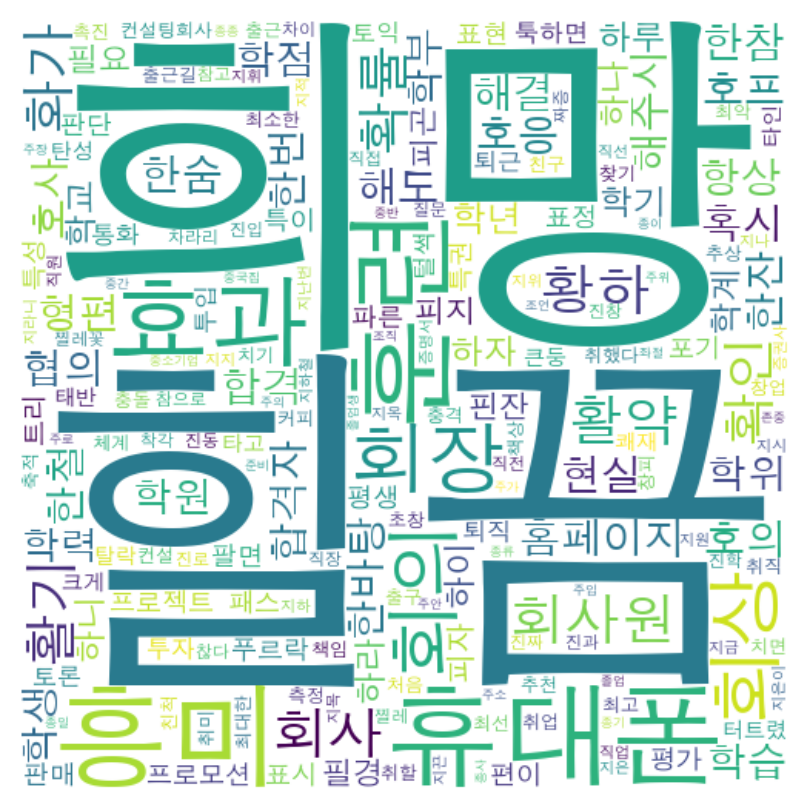

In [730]:
font_path='/Library/Fonts/AppleGothic.ttf'
wordcloud = WordCloud(width=500, height=500, background_color='white',font_path=font_path).generate_from_frequencies(tfidf.vocabulary_)

# 시각화
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---

In [701]:
f = open('./강경애-원고료_이백원-신가정.txt', encoding='utf-8')

In [702]:
txt = f.readlines()

In [703]:
txt2 = ' '.join(txt).split('.\n')

In [704]:
txt2 = [t + '.' for t in txt2]

In [705]:
txt2[5]

'  K야, 너도 짐작하는지 모르겠다마는! 나는 어려서부터 순조롭지 못한 가정\n 에서 자랐고 또 커서까지라도 순경에 처하지 못한 나는 그나마 쥐꼬리만큼\n 배운 이 지식까지라도 우리 형부의 덕이었니라. 그러니 어려서부터 명일빔\n 한 벌 색들여 못 입어 봤으며 먹는 것이란 언제나 조밥이었구나. 그러고 학\n 교에 다니면서도 맘대로 학용품을 어디 써보았겠니. 학기초마다 책을 못 사\n 서 울고 울다가는 겨우 남의 낡은 책을 얻어 가졌으며 종이와 붓이 없어 나\n 의 조고만 가슴은 그 몇 번이나 달막거리었는지 모른다.'

In [706]:
okt = Okt()

In [707]:
target = [okt.nouns(t) for t in txt2[5:25]]

In [708]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [709]:
vector = TfidfVectorizer()

In [710]:
target2 = [' '.join(t) for t in target]

In [711]:
target2

['너 짐작 나 부터 롭 못 가정 또 커서 순경 처 못 나 쥐꼬리 이 지식 우리 형부 덕 부터 명일 빔 벌 색 못 것 밥 학 교 학용품 어디 학 기초 책 못 사 울 겨우 남 책 종이 붓 나 의 조고 가슴 그 몇 번 거리 었',
 '나 기억 내 학교 년 때 일이 내일 학 시험 나 종이 붓 생각 나 옆 의 동무 것 선생님 얼마나 꾸지람 애 애 도적 년 도적 년 놀림 얼마나 더구나 선생님 그 눈 놀 시간 벌 나 두 손 유리창 곁 우두커니',
 '동무 운동장 눈사람 맨 손뼉 치',
 '나 벌 눈사람 그 입 그 눈 킥 또 다가',
 '남 것 생각 소위 중학교 나 바뿌더 맘 형부 학비 돈 겨우 식비 월사금 못 때 월 사금 못 물어 머리 선생님 바루 보지 못 적 모 르 학과 맘 나 기운 이 바보 따라서 동무 사람 보지',
 '까닭 하느님 더 의지 나 밤 기숙사 강당 목 울면 기도 그 괴롬 날 달마 자라 동무 양산 세루 치마 저고리 털 목도리 자켓 시계 지금 생각 그 모든 것 생각 그때 왜 리도 눈물 날 만큼 구나 그 폭 폭 신한 털실 목도리 동무 그 실 것 눈물 구나 학교 시대 구서 이 털실 맛 때 남편 당신 왜 자켓 하나 짤 줄 모루 때 나 문득 학교 시절 회상 동무 진 털실 간이 그 감정 다시 번',
 '여름 내일 방학 고향 터 동무 준비 바뿌구 그때 인조견 때 모두 쟁친 모시 치마 적삼 잠자리 날개 해 양산 양산 제 각기 사두 구나 그때 나 어째 무엇 양산 가지 영 구나 지금 여염집 부인 양산 가지 그때 야말로 여학생 구서 양산 못 줄 양산 야말로 무언 여학생 말 무슨 표 것 생각 철 내 맘 양산 못 가지 고향 구나 자꾸 만 울 방 동무 하나 이 눈치 인지 나 를 양산 하나 어데 나 어쩐지 화끈 냉큼 그 양산 질 수가 구나 동무 킥 나 나 그 동무 나 얼른 양산 쥐 하나 곳 이 그때 나 무어 말 수 울분 슬픔 목 나 그 양산',
 '나 길 듯 이만 나 과거 생활 너 짐작 터 나 현재 말 말 과거 말 그 원고료 오기 전 나 밤 잠 못 그 돈 무엇 생각 지금 생각 면 말

In [712]:
target_matrix = vector.fit_transform(target2).toarray()

In [713]:
df_col = vector.get_feature_names_out()

In [714]:
df_val = target_matrix

In [715]:
df = pd.DataFrame(df_val,columns=df_col)

In [716]:
df.iloc[3,65], df.iloc[3,68]

(0.7424277384490324, 0.6699261550211748)

In [717]:
df.columns[65],df.columns[68]

('눈사람', '다가')

In [718]:
txt2[8]

' 나는 벌을 서면서도 눈사람의 그 입과 그 눈이 우스워서 킥 하고 웃다가 또\n 울다가 하였다.'

In [719]:
df[df.values > 0.5]

,가나,가뜩이나,가라,가루,가슴,가정,가지,각기,간이,감고,...,형부,형편,호가,호랑이,혼자,화끈,홰눙년,회상,흔적,흠칫
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.0,0.0,0.0,0.170058,0.078016,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.078016,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
11,0.0,0.083135,0.0,0.0,0.0,0.0,0.060406,0.000000,0.0,0.0,...,0.0,0.0,0.083135,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
13,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
13,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
15,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
